In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.pyplot as plt
import re
import json
import os

1.Lecture des datasets 

In [31]:
#Dataset 1 : players 
df1 = pd.read_csv('atp_players.csv')
df1.head()

,player_id,first_name,first_initial,last_name,full_name,player_url,flag_code,residence,birthplace,birthdate,...,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand
0,a002,Ricardo,R,Acuna,Acuna R,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",19580113,...,1.0,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN
1,a001,Sadiq,S,Abdullahi,Abdullahi S,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,19600202,...,2.0,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN
2,a005,Nelson,N,Aerts,Aerts N,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",19630425,...,4.0,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN
3,a004,Egan,E,Adams,Adams E,http://www.atpworldtour.com/en/players/egan-ad...,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",19590615,...,6.0,15.0,0.0,160.0,73.0,"5'10""",70.0,178.0,NaN,NaN
4,a006,Ronald,R,Agenor,Agenor R,http://www.atpworldtour.com/en/players/ronald-...,USA,"Beverly Hills, California, USA","Rabat, Morocco",19641113,...,11.0,13.0,1983.0,180.0,82.0,"5'11""",71.0,180.0,NaN,NaN


2.Supression des colonnes vides : 

In [32]:
df1 = df1.dropna(axis=1, how='all')
df1.head()

,player_id,first_name,first_initial,last_name,full_name,player_url,flag_code,residence,birthplace,birthdate,...,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand
0,a002,Ricardo,R,Acuna,Acuna R,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",19580113,...,1.0,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN
1,a001,Sadiq,S,Abdullahi,Abdullahi S,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,19600202,...,2.0,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN
2,a005,Nelson,N,Aerts,Aerts N,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",19630425,...,4.0,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN
3,a004,Egan,E,Adams,Adams E,http://www.atpworldtour.com/en/players/egan-ad...,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",19590615,...,6.0,15.0,0.0,160.0,73.0,"5'10""",70.0,178.0,NaN,NaN
4,a006,Ronald,R,Agenor,Agenor R,http://www.atpworldtour.com/en/players/ronald-...,USA,"Beverly Hills, California, USA","Rabat, Morocco",19641113,...,11.0,13.0,1983.0,180.0,82.0,"5'11""",71.0,180.0,NaN,NaN


2.Affichage des valeurs manquantes 

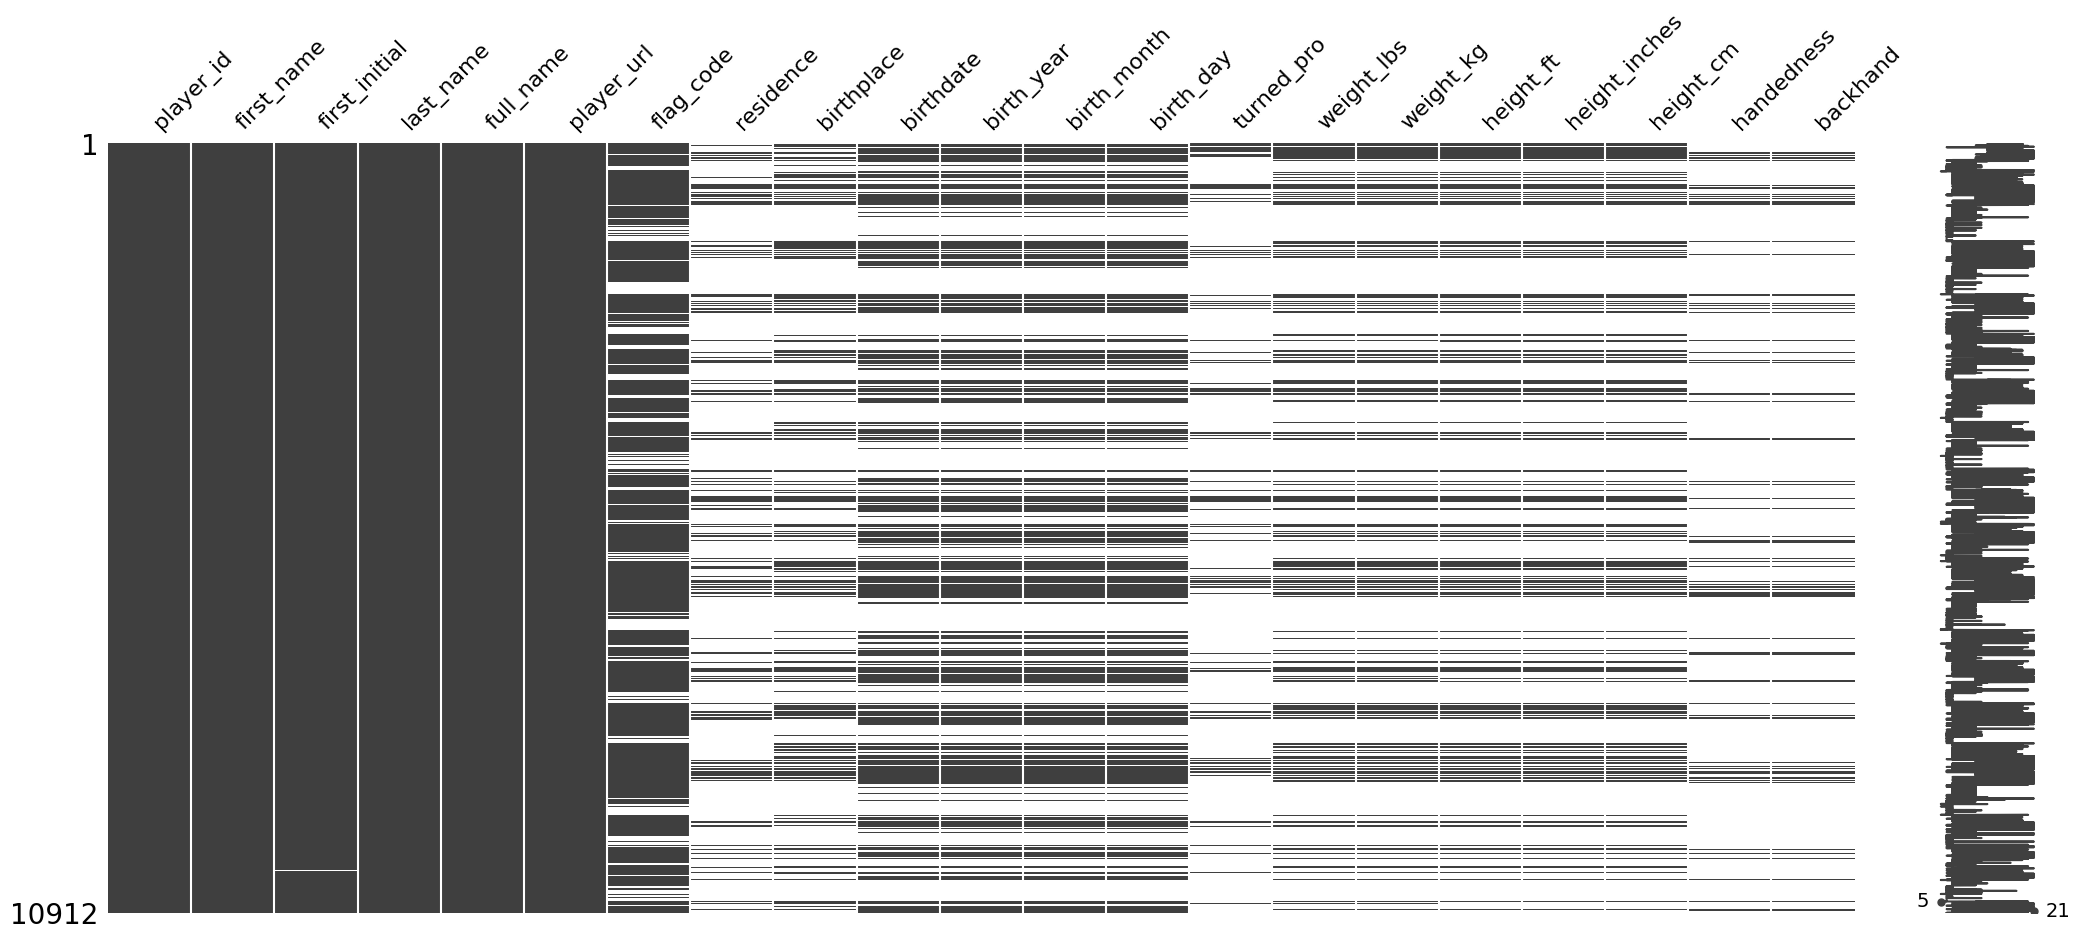

In [33]:
msno.matrix(df1)
plt.show()

3.Supression des colonnes pas importantes 


In [34]:
colonnes_a_supprimer = ['first_initial', 'player_id', 'full_name', 'player_url', 
                        'birth_month', 'birth_day', 'weight_lbs', 'height_ft', 
                        'height_inches']
df1 = df1.drop(columns=colonnes_a_supprimer)
df1.head()

,first_name,last_name,flag_code,residence,birthplace,birthdate,birth_year,turned_pro,weight_kg,height_cm,handedness,backhand
0,Ricardo,Acuna,CHI,"Jupiter, FL, USA","Santiago, Chile",19580113,1958.0,0.0,68.0,175.0,NaN,NaN
1,Sadiq,Abdullahi,NGR,NaN,NaN,19600202,1960.0,0.0,0.0,0.0,NaN,NaN
2,Nelson,Aerts,BRA,NaN,"Cachoeira Do Sul, Brazil",19630425,1963.0,0.0,75.0,188.0,NaN,NaN
3,Egan,Adams,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",19590615,1959.0,0.0,73.0,178.0,NaN,NaN
4,Ronald,Agenor,USA,"Beverly Hills, California, USA","Rabat, Morocco",19641113,1964.0,1983.0,82.0,180.0,NaN,NaN


4.Remplacer par 0 


In [35]:
df1 = df1.fillna(0)

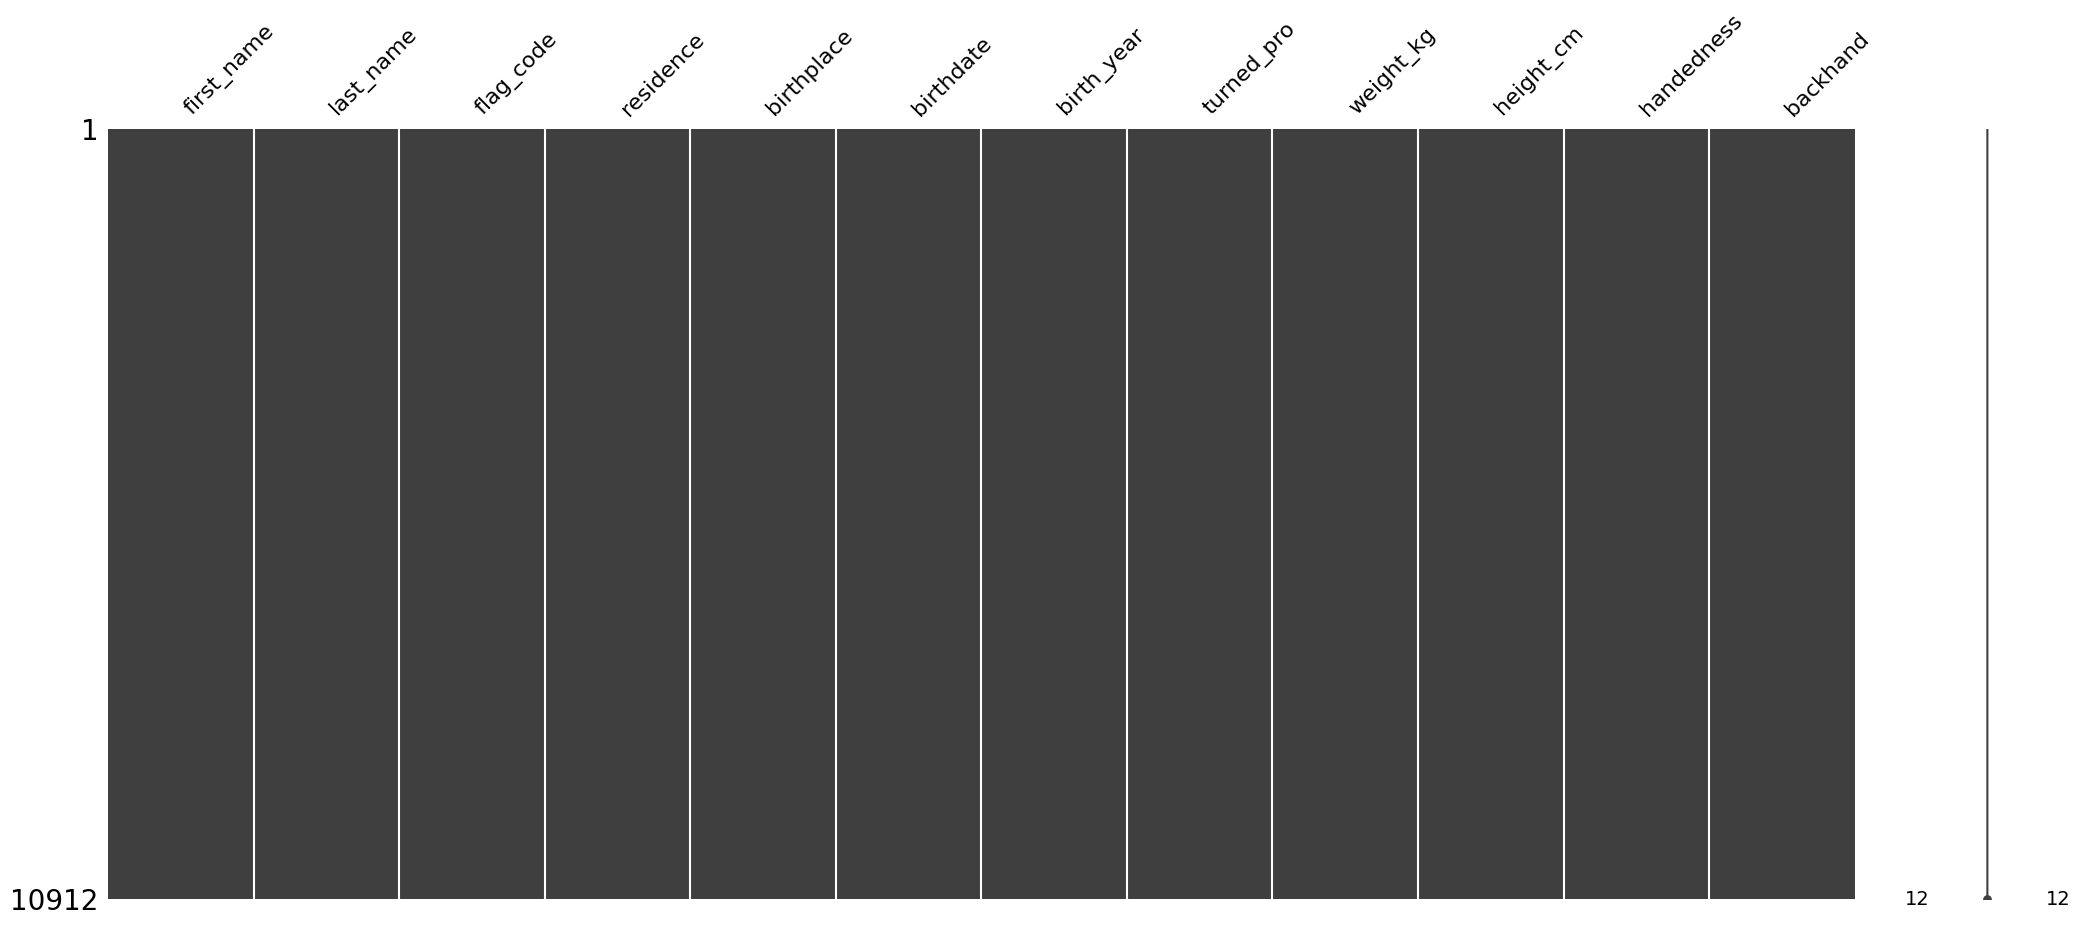

In [36]:
msno.matrix(df1)
plt.show()

-------------------------------------------------------- Fin atp players --------------------------------------------------------------------------------------------

II.Lecture datasets 

In [37]:
df2 = pd.read_excel('atp_2000.xls')
df2.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2,0,Completed
1,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Enqvist T.,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2,0,Completed
2,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,...,5.0,6.0,3.0,NaN,NaN,NaN,NaN,2,1,Completed
3,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Federer R.,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2,0,Completed
4,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,...,7.0,6.0,4.0,NaN,NaN,NaN,NaN,2,1,Completed


2.Supression des colonnes vides 

In [38]:
df2 = df2.dropna(axis=1, how='all')
df2.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2,0,Completed
1,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Enqvist T.,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2,0,Completed
2,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,...,5.0,6.0,3.0,NaN,NaN,NaN,NaN,2,1,Completed
3,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Federer R.,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2,0,Completed
4,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,...,7.0,6.0,4.0,NaN,NaN,NaN,NaN,2,1,Completed


3.Val manquantes 

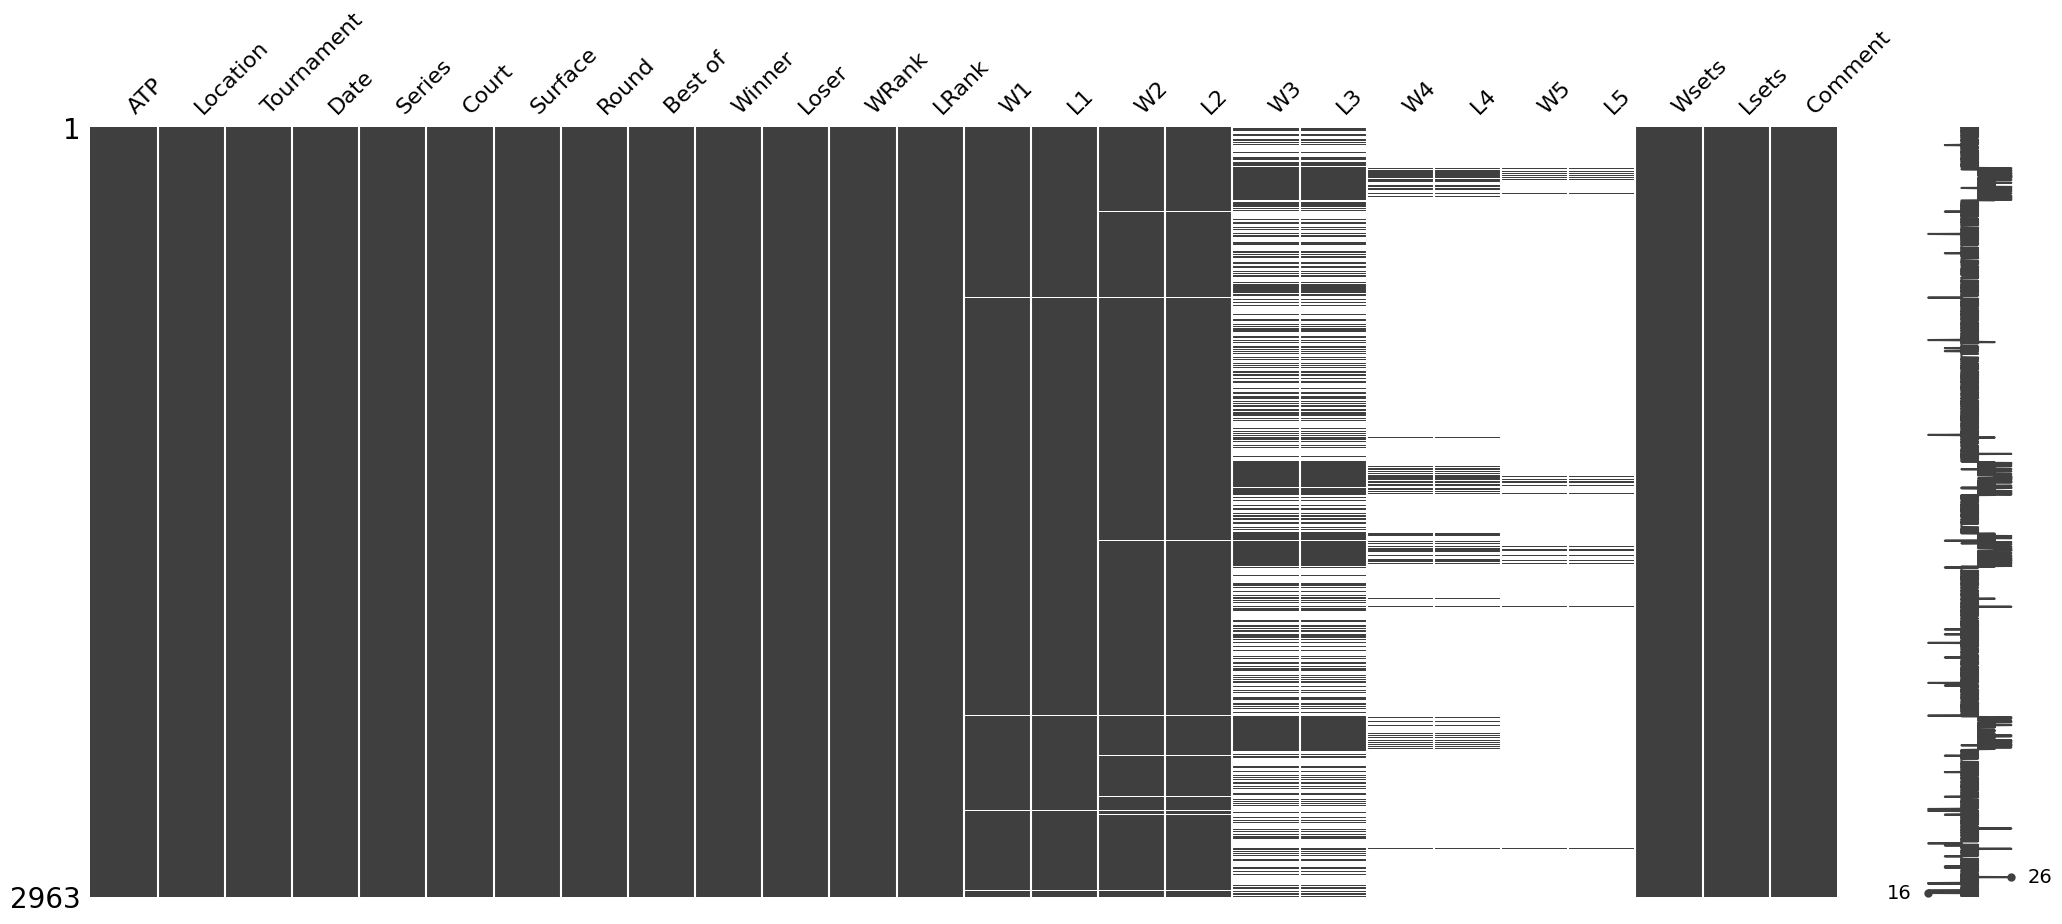

In [39]:
msno.matrix(df2)
plt.show()

In [40]:
colonnes_a_supprimer = ['W4', 'L4', 'W5', 'L5']
df2 = df2.drop(columns=colonnes_a_supprimer)

In [41]:
df2 = df2.fillna(0)

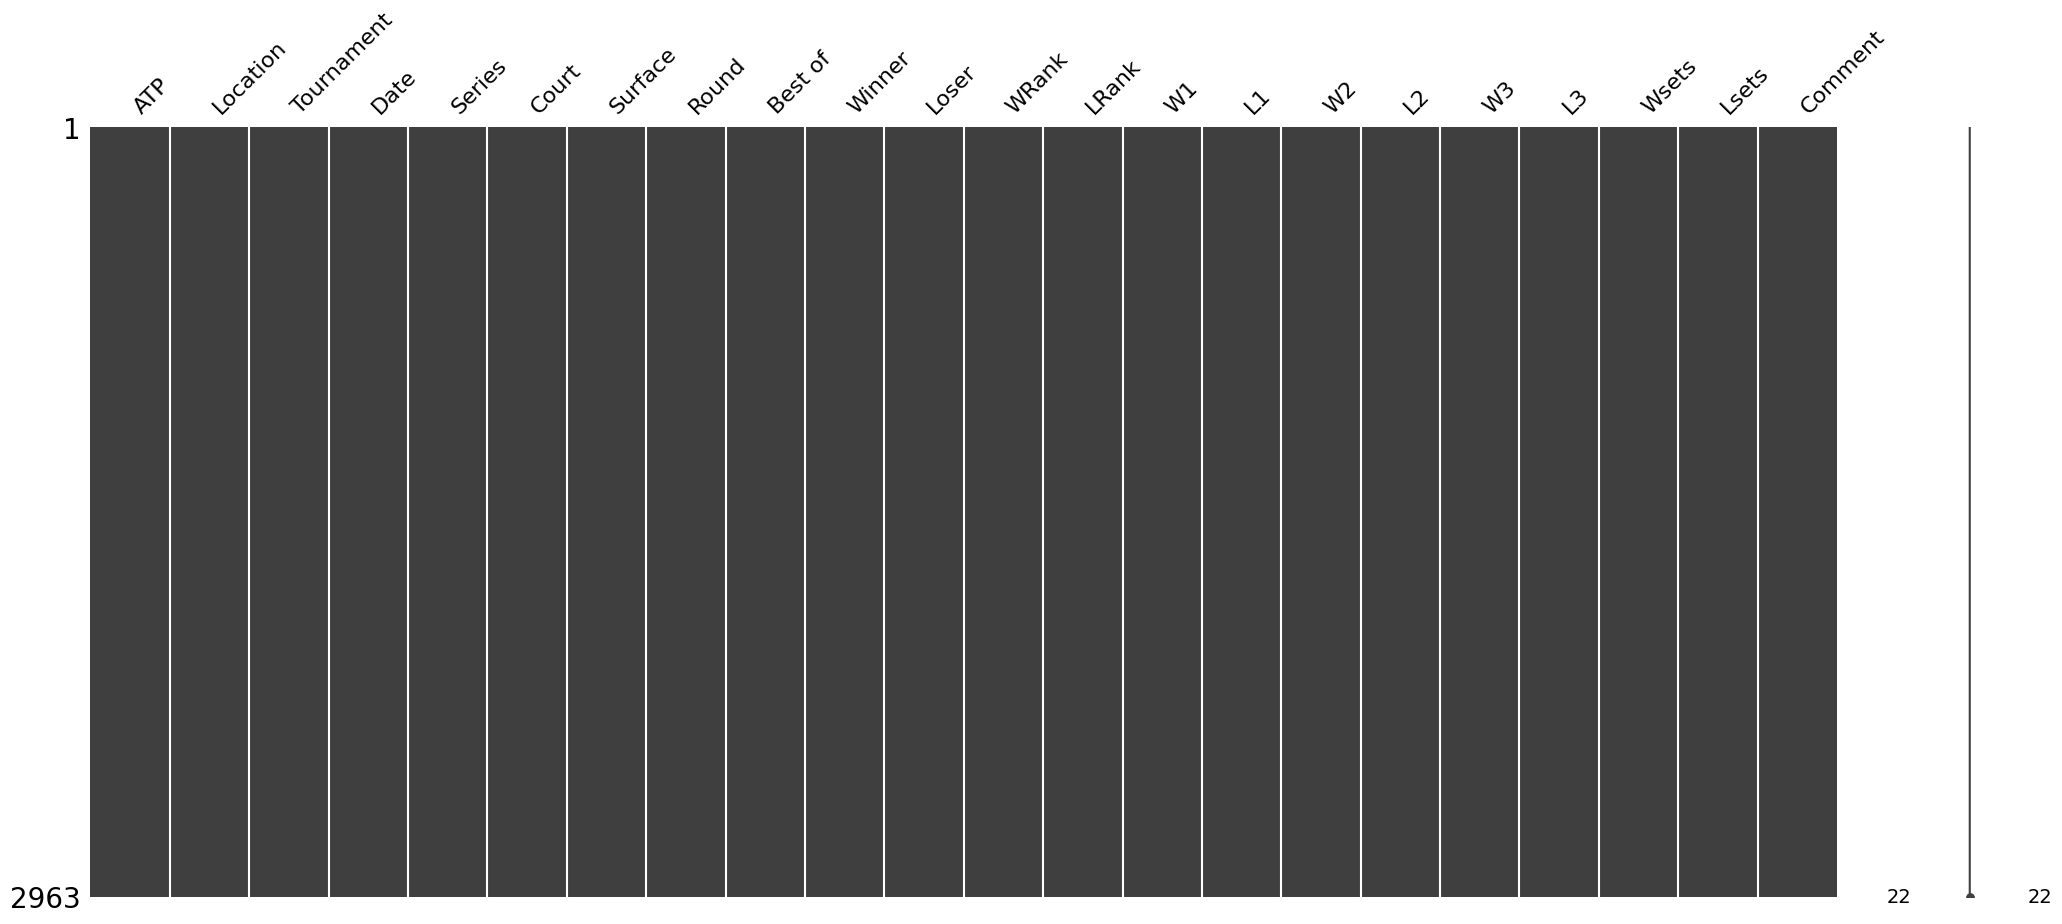

In [42]:
msno.matrix(df2)
plt.show()

5.Faire le meme nettoyage pour tous les datasets 

In [43]:
def nettoyer_dataset(nom_fichier):
    df = pd.read_excel(nom_fichier)
    df = df.dropna(axis=1, how='all')
    colonnes_a_supprimer = ['W4', 'L4', 'W5', 'L5']
    df = df.drop(columns=colonnes_a_supprimer)
    df = df.fillna(0)
    
    return df


datasets_xls = ['atp_2001.xls', 'atp_2002.xls', 'atp_2003.xls', 'atp_2004.xls', 'atp_2005.xls', 'atp_2006.xls', 'atp_2007.xls', 'atp_2008.xls', 'atp_2009.xls', 'atp_2010.xls', 'atp_2011.xls', 'atp_2012.xls']
datasets_xlsx = ['atp_2013.xlsx', 'atp_2014.xlsx', 'atp_2015.xlsx', 'atp_2016.xlsx', 'atp_2017.xlsx', 'atp_2018.xlsx', 'atp_2019.xlsx', 'atp_2020.xlsx', 'atp_2021.xlsx', 'atp_2022.xlsx', 'atp_2023.xlsx', 'atp_2024.xlsx']
chemin_repertoire = "C:/Users/sonia/Documents/GitHub/Projet_Sp-/Nettoyage data/Datasets/atp-match-data"

# Nettoyer chaque dataset au format XLS
for dataset in datasets_xls:
    chemin_fichier = os.path.join(chemin_repertoire, dataset)
    print(f"Nettoyage du dataset {dataset}...")
    df_nettoye = nettoyer_dataset(chemin_fichier)
    
for dataset in datasets_xlsx:
    chemin_fichier = os.path.join(chemin_repertoire, dataset)
    print(f"Nettoyage du dataset {dataset}...")
    df_nettoye = nettoyer_dataset(chemin_fichier)

Nettoyage du dataset atp_2001.xls...
Nettoyage du dataset atp_2002.xls...
Nettoyage du dataset atp_2003.xls...
Nettoyage du dataset atp_2004.xls...
Nettoyage du dataset atp_2005.xls...
Nettoyage du dataset atp_2006.xls...
Nettoyage du dataset atp_2007.xls...
Nettoyage du dataset atp_2008.xls...
Nettoyage du dataset atp_2009.xls...
Nettoyage du dataset atp_2010.xls...
Nettoyage du dataset atp_2011.xls...
Nettoyage du dataset atp_2012.xls...
Nettoyage du dataset atp_2013.xlsx...


c:\Users\sonia\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Nettoyage du dataset atp_2014.xlsx...


c:\Users\sonia\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Nettoyage du dataset atp_2015.xlsx...


c:\Users\sonia\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Nettoyage du dataset atp_2016.xlsx...


c:\Users\sonia\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Nettoyage du dataset atp_2017.xlsx...
Nettoyage du dataset atp_2018.xlsx...
Nettoyage du dataset atp_2019.xlsx...
Nettoyage du dataset atp_2020.xlsx...
Nettoyage du dataset atp_2021.xlsx...
Nettoyage du dataset atp_2022.xlsx...
Nettoyage du dataset atp_2023.xlsx...
Nettoyage du dataset atp_2024.xlsx...


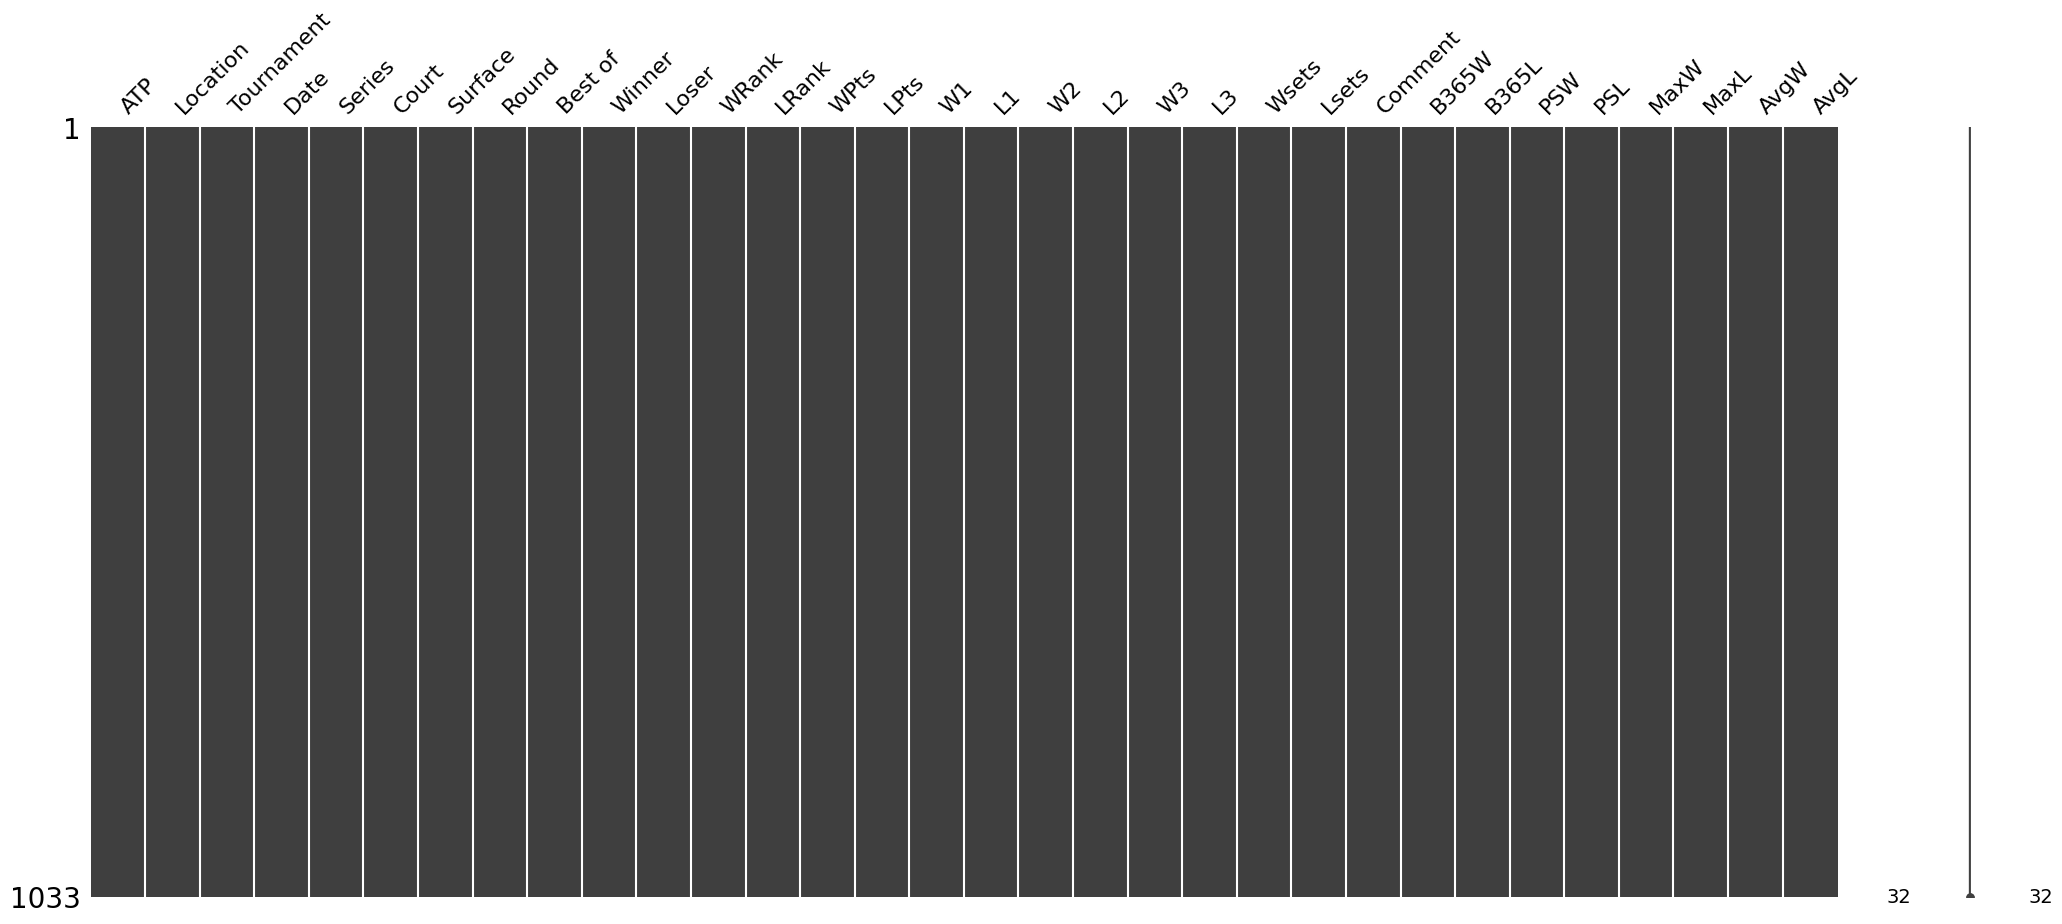

In [45]:
msno.matrix(df_nettoye)
plt.show()